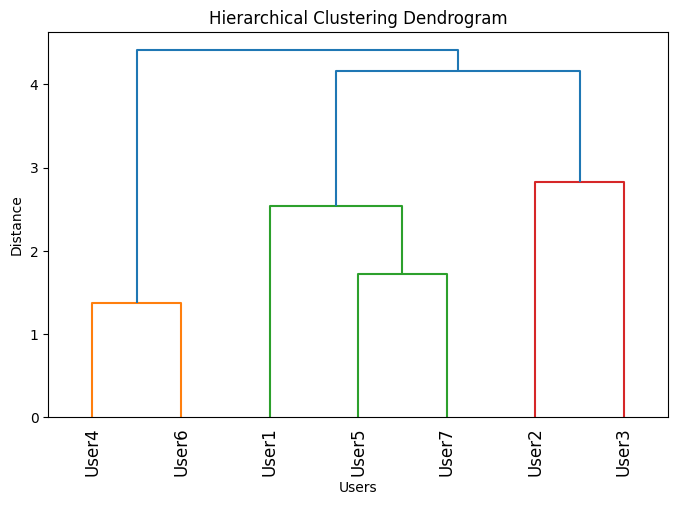


Cluster vs. Cognitive Status:
 CognitiveStatus  Demented  Healthy  MCI
Cluster                                
1                       1        1    0
2                       0        2    1
3                       1        0    1

Chi-Square Test: χ²=3.69, p-value=0.4489


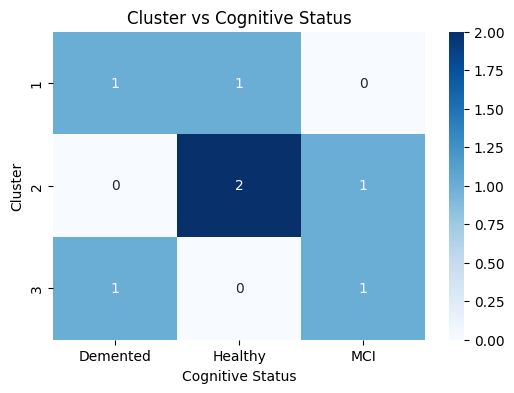

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency

# Sample Users & Brain Regions
users = ["User1", "User2", "User3", "User4", "User5", "User6", "User7"]
brain_regions = ["RegionA", "RegionB", "RegionC", "RegionD"]

# Simulated BOLD signals
np.random.seed(42)
bold_signals = {user: np.random.rand(len(brain_regions)) for user in users}

# Create DataFrame
df = pd.DataFrame.from_dict(bold_signals, orient="index", columns=brain_regions)

# Assign Cognitive Status to Users
cognitive_status = {
    "User1": "Healthy",
    "User2": "MCI",
    "User3": "Demented",
    "User4": "Healthy",
    "User5": "MCI",
    "User6": "Demented",
    "User7": "Healthy",
}
df["CognitiveStatus"] = df.index.map(cognitive_status)

# Normalize Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=["CognitiveStatus"]))

# Perform Hierarchical Clustering
linkage_matrix = linkage(df_scaled, method='ward')  # 'ward' minimizes variance
plt.figure(figsize=(8, 5))
dendrogram(linkage_matrix, labels=df.index, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Users")
plt.ylabel("Distance")
plt.show()

# Assign Cluster Labels
num_clusters = 3  # Choose based on dendrogram
df["Cluster"] = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Crosstab: Compare Clusters with Cognitive Status
contingency_table = pd.crosstab(df["Cluster"], df["CognitiveStatus"])
print("\nCluster vs. Cognitive Status:\n", contingency_table)

# Statistical Test: Chi-Square (Check if Clustering Aligns with Cognitive Status)
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"\nChi-Square Test: χ²={chi2:.2f}, p-value={p:.4f}")

# Visualize Clusters vs Cognitive Status
plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d")
plt.title("Cluster vs Cognitive Status")
plt.ylabel("Cluster")
plt.xlabel("Cognitive Status")
plt.show()
